In [16]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import time
# import flann_match

In [17]:
def Flann_match(img1, img2, des1, des2, kp1, kp2):
    #find matches using FLANN
    FLANN_INDEX_KDTREE = 0
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    search_params = dict(checks = 50)

    flann = cv2.FlannBasedMatcher(index_params, search_params)

    matches = flann.knnMatch(des1,des2,k=2)

#apply ratio test to find best matches (values from 0.7-1 made sense here)
    good = []
    for m,n in matches:
        if m.distance < 0.8*n.distance:
            good.append(m)

#find homography to transform the edges of the query image and draw them on the train image
#This is also used to mask all keypoints that aren't inside this box further below.
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good]).reshape(-1,1,2)

    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()

    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)
    img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)
    
    return(img2, matchesMask, good)

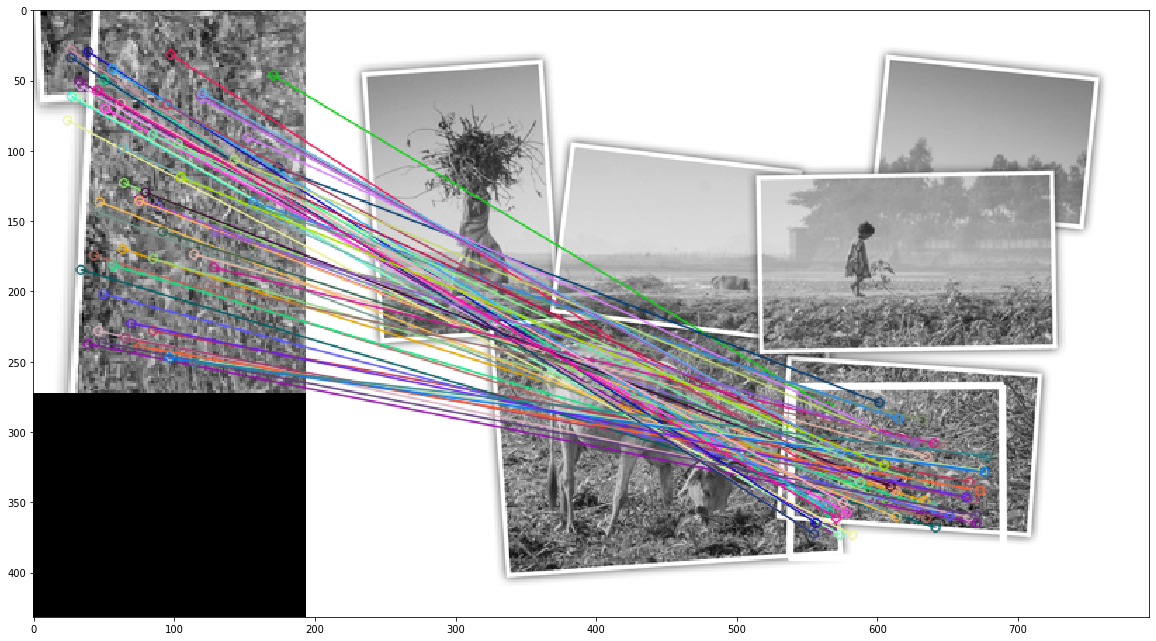


Number of Matching Keypoints Between The Training and Query Images:  75
0.8759838999999943 seconds


In [19]:
start_time = time.perf_counter()

MIN_MATCH_COUNT = 10

img1 = cv2.imread("C:/Users/sapph/downloads/project/Image/query1.png",0)          # queryImage
img2 = cv2.imread('C:/Users/sapph/downloads/project/Image/mix.jpg',0) # trainImage

# Initiate SIFT detector
surf =  cv2.xfeatures2d.SURF_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = surf.detectAndCompute(img1,None)
kp2, des2 = surf.detectAndCompute(img2,None)

result= Flann_match(img1, img2, des1, des2, kp1, kp2)
img2, matchesMask, good = result

#draw the good matched key points
draw_params = dict(matchColor = None, # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask[:], # draw only inliers
                   flags = 2)

output1 = cv2.drawMatches(img1,kp1,img2,kp2,good[:],None,**draw_params)

plt.figure(figsize=(20,20))
plt.imshow(output1, 'gray')
plt.show()
print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(good))


Total_Execution_Time = time.perf_counter() - start_time
print(Total_Execution_Time, "seconds")

In [45]:
# start time
start_time = time.perf_counter()

MIN_MATCH_COUNT = 10

img1 = cv2.imread("C:/Users/sapph/downloads/project/Image/sample_test_image_query_1.png",0)          # queryImage
img2 = cv2.imread('C:/Users/sapph/downloads/project/Image/sample_test_image_1.png',0) # trainImage

img3 = cv2.imread("C:/Users/sapph/downloads/project/Image/sample_test_image_query_2.jpg",0)          # queryImage
img4 = cv2.imread('C:/Users/sapph/downloads/project/Image/sample_test_image_2.jpg',0) # trainImage

img5 = cv2.imread("C:/Users/sapph/downloads/project/Image/sample_test_image_query_3.jpg",0)          # queryImage
img6 = cv2.imread('C:/Users/sapph/downloads/project/Image/sample_test_image_3.jpg',0) # trainImage

img7 = cv2.imread("C:/Users/sapph/downloads/project/Image/sample_test_image_query_4.jpg",0)          # queryImage
img8 = cv2.imread('C:/Users/sapph/downloads/project/Image/sample_test_image_4.jpg',0) # trainImage

img9 = cv2.imread("C:/Users/sapph/downloads/project/Image/sample_test_image_query_5.jpg",0)          # queryImage
img10 = cv2.imread('C:/Users/sapph/downloads/project/Image/sample_test_image_5.jpg',0) # trainImage

# Initiate SURF detector
surf =  cv2.xfeatures2d.SURF_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = surf.detectAndCompute(img1,None)
kp2, des2 = surf.detectAndCompute(img2,None)

kp3, des3 = surf.detectAndCompute(img3,None)
kp4, des4 = surf.detectAndCompute(img4,None)

kp5, des5 = surf.detectAndCompute(img5,None)
kp6, des6 = surf.detectAndCompute(img6,None)

kp7, des7 = surf.detectAndCompute(img7,None)
kp8, des8 = surf.detectAndCompute(img8,None)

kp9, des9 = surf.detectAndCompute(img9,None)
kp10, des10 = surf.detectAndCompute(img10,None)

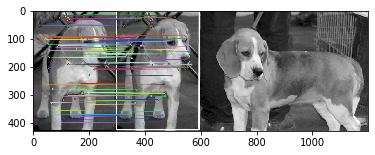


Number of Matching Keypoints Between The Training and Query Images:  663


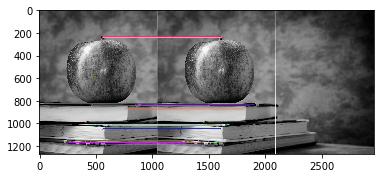


Number of Matching Keypoints Between The Training and Query Images:  5084


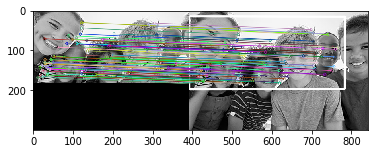


Number of Matching Keypoints Between The Training and Query Images:  535


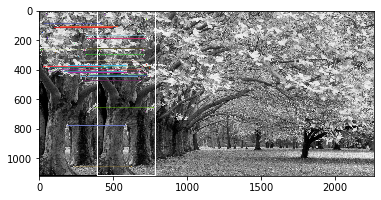


Number of Matching Keypoints Between The Training and Query Images:  4048


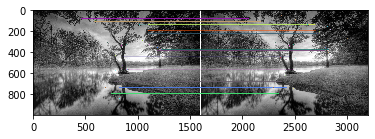


Number of Matching Keypoints Between The Training and Query Images:  15645
25.622146199981216 seconds


In [46]:
# Flann points for Image 1 and 2
result= Flann_match(img1, img2, des1, des2, kp1, kp2)
img2, matchesMask, good = result

#draw the good matched key points
draw_params = dict(matchColor = None, # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask[:100], # draw only inliers
                   flags = 2)

# points for Image 3 and 4
result1= Flann_match(img3, img4, des3, des4, kp3, kp4)
img4, matchesMask1, good1 = result1

#draw the good matched key points
draw_params1 = dict(matchColor = None, # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask1[:100], # draw only inliers
                   flags = 2)

# points for Image 5 and 6
result2= Flann_match(img5, img6, des5, des6, kp5, kp6)
img6, matchesMask2, good2 = result2

#draw the good matched key points
draw_params2 = dict(matchColor = None, # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask2[:100], # draw only inliers
                   flags = 2)

# points for Image 7 and 8
result3= Flann_match(img7, img8, des7, des8, kp7, kp8)
img8, matchesMask3, good3 = result3

#draw the good matched key points
draw_params3 = dict(matchColor = None, # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask3[:100], # draw only inliers
                   flags = 2)

# points for Image 9 and 10
result4= Flann_match(img9, img10, des9, des10, kp9, kp10)
img10, matchesMask4, good4 = result4

#draw the good matched key points
draw_params4 = dict(matchColor = None, # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask4[:100], # draw only inliers
                   flags = 2)


output1 = cv2.drawMatches(img1,kp1,img2,kp2,good[:100],None,**draw_params)
output2 = cv2.drawMatches(img3,kp3,img4,kp4,good1[:100],None,**draw_params1)
output3 = cv2.drawMatches(img5,kp5,img6,kp6,good2[:100],None,**draw_params2)
output4 = cv2.drawMatches(img7,kp7,img8,kp8,good3[:100],None, **draw_params3)
output5 = cv2.drawMatches(img9,kp9,img10,kp10,good4[:100],None,**draw_params4)

plt.figure()

plt.imshow(output1, 'gray'),
plt.show()
print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(good))

plt.imshow(output2, 'gray'),
plt.show()
print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(good1))

plt.imshow(output3, 'gray'),
plt.show()
print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(good2))

plt.imshow(output4, 'gray'),
plt.show()
print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(good3))

plt.imshow(output5, 'gray'),
plt.show()
print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(good4))


Total_Execution_Time = time.perf_counter() - start_time
print(Total_Execution_Time, "seconds")